# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [48]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [49]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


### 1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [50]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [51]:
df.groupby('flag_doente')['sex'].mean()

flag_doente
0    0.560976
1    0.820144
Name: sex, dtype: float64

In [52]:
tab['chance'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,chance
sex,,,,
0.0,72,25,97,0.347222
1.0,92,114,206,1.239130
All,164,139,303,0.847561


In [53]:
tab['RC_vs_all'] = tab['chance']/tab.loc['All','chance']
tab

flag_doente,0,1,All,chance,RC_vs_all
sex,,,,,
0.0,72,25,97,0.347222,0.409672
1.0,92,114,206,1.239130,1.461996
All,164,139,303,0.847561,1.000000


In [54]:
tab['logito'] = np.log(tab['chance'])
tab

flag_doente,0,1,All,chance,RC_vs_all,logito
sex,,,,,,
0.0,72,25,97,0.347222,0.409672,-1.057790
1.0,92,114,206,1.239130,1.461996,0.214410
All,164,139,303,0.847561,1.000000,-0.165392


In [55]:
tab['log_rc'] = np.log(tab['RC_vs_all'])
tab

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
sex,,,,,,,
0.0,72,25,97,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


### 2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [56]:
df['qcut_age'] = pd.qcut(df['age'], 5)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,qcut_age
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(62.0, 77.0]"
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(62.0, 77.0]"
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(62.0, 77.0]"
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.999, 45.0]"
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(28.999, 45.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,"(28.999, 45.0]"
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,"(62.0, 77.0]"
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,"(53.0, 58.0]"
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,"(53.0, 58.0]"


In [57]:
tab = pd.crosstab(df['qcut_age'], df['flag_doente'], margins= True)
tab

flag_doente,0,1,All
qcut_age,,,
"(28.999, 45.0]",47,16,63
"(45.0, 53.0]",42,22,64
"(53.0, 58.0]",32,39,71
"(58.0, 62.0]",13,32,45
"(62.0, 77.0]",30,30,60
All,164,139,303


In [60]:
tab['chance'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,chance
qcut_age,,,,
"(28.999, 45.0]",47,16,63,0.340426
"(45.0, 53.0]",42,22,64,0.523810
"(53.0, 58.0]",32,39,71,1.218750
"(58.0, 62.0]",13,32,45,2.461538
"(62.0, 77.0]",30,30,60,1.000000
All,164,139,303,0.847561


In [61]:
tab['RC_vs_all'] = tab['chance']/tab.loc['All','chance']
tab

flag_doente,0,1,All,chance,RC_vs_all
qcut_age,,,,,
"(28.999, 45.0]",47,16,63,0.340426,0.401653
"(45.0, 53.0]",42,22,64,0.523810,0.618020
"(53.0, 58.0]",32,39,71,1.218750,1.437950
"(58.0, 62.0]",13,32,45,2.461538,2.904261
"(62.0, 77.0]",30,30,60,1.000000,1.179856
All,164,139,303,0.847561,1.000000


In [62]:
tab['logito'] = np.log(tab['chance'])
tab

flag_doente,0,1,All,chance,RC_vs_all,logito
qcut_age,,,,,,
"(28.999, 45.0]",47,16,63,0.340426,0.401653,-1.077559
"(45.0, 53.0]",42,22,64,0.523810,0.618020,-0.646627
"(53.0, 58.0]",32,39,71,1.218750,1.437950,0.197826
"(58.0, 62.0]",13,32,45,2.461538,2.904261,0.900787
"(62.0, 77.0]",30,30,60,1.000000,1.179856,0.000000
All,164,139,303,0.847561,1.000000,-0.165392


In [63]:
tab['log_rc'] = np.log(tab['RC_vs_all'])
tab

flag_doente,0,1,All,chance,RC_vs_all,logito,log_rc
qcut_age,,,,,,,
"(28.999, 45.0]",47,16,63,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.847561,1.000000,-0.165392,0.000000


### 3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

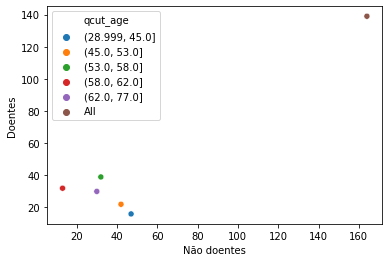

In [87]:
ax = sns.scatterplot(data=tab, x=0, y=1, hue='qcut_age')
ax.set(xlabel='Não doentes', ylabel='Doentes');
plt.show()

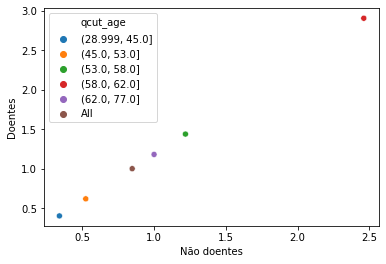

In [89]:
ax = sns.scatterplot(data=tab, x='chance', y='RC_vs_all', hue='qcut_age')
ax.set(xlabel='Chance', ylabel='Chance Ratio');
plt.show()

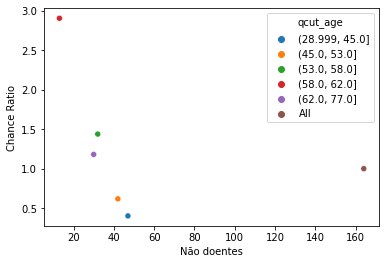

In [91]:
ax = sns.scatterplot(data=tab, x=0, y='RC_vs_all', hue='qcut_age')
ax.set(xlabel='Não doentes', ylabel='Chance Ratio');
plt.show()